## Proyecto Mineria de Datos

# Analsis Exploratorio

In [1]:
# Citar librerias
#Importar librerías
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib as mpl
import seaborn as sns
%matplotlib inline
plt.rcParams['figure.dpi'] = 110  
import plotly
print(f'Plotly: {plotly.__version__}')
import plotly.graph_objs as go 
import plotly.express as px

from scipy import stats
import scipy
import statsmodels.api as sm

Plotly: 4.14.3


In [2]:
# Ejecute esta celda para instalar la versión más reciente
!pip install -U plotly
!pip install -U kaleido 

Requirement already up-to-date: plotly in c:\users\alejo\anaconda3\lib\site-packages (4.14.3)
Requirement already up-to-date: kaleido in c:\users\alejo\anaconda3\lib\site-packages (0.2.1)


# 1) Importa Dataframe 

In [3]:
df= pd.read_csv('covid.csv', low_memory=False)

In [4]:
df.head()

,fecha reporte web,ID de caso,Fecha de notificación,Código DIVIPOLA departamento,Nombre departamento,Código DIVIPOLA municipio,Nombre municipio,Edad,Unidad de medida de edad,Sexo,...,Código ISO del país,Nombre del país,Recuperado,Fecha de inicio de síntomas,Fecha de muerte,Fecha de diagnóstico,Fecha de recuperación,Tipo de recuperación,Pertenencia étnica,Nombre del grupo étnico
0,6/3/2020 0:00:00,1,2/3/2020 0:00:00,11,BOGOTA,11001,BOGOTA,19,1,F,...,380.0,ITALIA,Recuperado,27/2/2020 0:00:00,NaN,6/3/2020 0:00:00,13/3/2020 0:00:00,PCR,6.0,NaN
1,9/3/2020 0:00:00,2,6/3/2020 0:00:00,76,VALLE,76111,BUGA,34,1,M,...,724.0,ESPAÑA,Recuperado,4/3/2020 0:00:00,NaN,9/3/2020 0:00:00,19/3/2020 0:00:00,PCR,5.0,NaN
2,9/3/2020 0:00:00,3,7/3/2020 0:00:00,5,ANTIOQUIA,5001,MEDELLIN,50,1,F,...,724.0,ESPAÑA,Recuperado,29/2/2020 0:00:00,NaN,9/3/2020 0:00:00,15/3/2020 0:00:00,PCR,6.0,NaN
3,11/3/2020 0:00:00,4,9/3/2020 0:00:00,5,ANTIOQUIA,5001,MEDELLIN,55,1,M,...,NaN,NaN,Recuperado,6/3/2020 0:00:00,NaN,11/3/2020 0:00:00,26/3/2020 0:00:00,PCR,6.0,NaN
4,11/3/2020 0:00:00,5,9/3/2020 0:00:00,5,ANTIOQUIA,5001,MEDELLIN,25,1,M,...,NaN,NaN,Recuperado,8/3/2020 0:00:00,NaN,11/3/2020 0:00:00,23/3/2020 0:00:00,PCR,6.0,NaN


## **1.1) Dimensiones del Dataframe**

In [5]:
dim=df.shape
print('El Dataframe tiene',dim [1] ,'columnas y ',dim [0] ,'filas, para tener un total de',dim [1]*dim [0],'datos' )

El Dataframe tiene 23 columnas y  2319293 filas, para tener un total de 53343739 datos


## **1.2) Tipo de vairables del Dataframe**

df.dtypes

Como se ve existen valores de clase (**objects**) y valores numericos del tipo flotante(**float 64**) en cuanto  los IDS son numeros enteros ya que son codigos(**int 64**)

## **1.3) Identificar valores y duplicados nulos**

In [6]:
df.duplicated().sum()

0

In [7]:
df.isnull().sum()

fecha reporte web                     0
ID de caso                            0
Fecha de notificación                 0
Código DIVIPOLA departamento          0
Nombre departamento                   0
Código DIVIPOLA municipio             0
Nombre municipio                      0
Edad                                  0
Unidad de medida de edad              0
Sexo                                  0
Tipo de contagio                      0
Ubicación del caso                 9131
Estado                             9131
Código ISO del país             2316888
Nombre del país                 2316880
Recuperado                         7734
Fecha de inicio de síntomas      272631
Fecha de muerte                 2248528
Fecha de diagnóstico               4108
Fecha de recuperación            102348
Tipo de recuperación             102348
Pertenencia étnica                28754
Nombre del grupo étnico         2281769
dtype: int64

Como se puede ver el dataframe tiene valores faltantes, por lo cual, se mirara la cantidad y las maneras de solventar esta situación.


In [8]:
df.dtypes

fecha reporte web                object
ID de caso                        int64
Fecha de notificación            object
Código DIVIPOLA departamento      int64
Nombre departamento              object
Código DIVIPOLA municipio         int64
Nombre municipio                 object
Edad                              int64
Unidad de medida de edad          int64
Sexo                             object
Tipo de contagio                 object
Ubicación del caso               object
Estado                           object
Código ISO del país             float64
Nombre del país                  object
Recuperado                       object
Fecha de inicio de síntomas      object
Fecha de muerte                  object
Fecha de diagnóstico             object
Fecha de recuperación            object
Tipo de recuperación             object
Pertenencia étnica              float64
Nombre del grupo étnico          object
dtype: object

# 2) Pre-tratamiento de los datos

# 2.1 Eliminacion de Columnas

En el dataframe se tienen Columnas que se podrian eliminar, estas son las que representan un codigo de una clase com ID del caso, COdigo DIVIPOLA

In [9]:
del df['ID de caso']
del df['Código DIVIPOLA departamento']
del df['Código DIVIPOLA municipio']
del df['Código ISO del país']

# 2.2 Analisis de datos

## 2.2.1 Columna **"Fecha de reporte Web"**

En esta columna se muestran las fechas donde el caso se reporto via Web, esta fecha puede ser el mismo dia de reporte del caso o despues.

In [10]:
df['fecha reporte web'].describe()

count               2319293
unique                  375
top       15/1/2021 0:00:00
freq                  21082
Name: fecha reporte web, dtype: object

**Nota:** No se encontraron en inspeccion datos que no pertenecian a esta categoria

## 2.2.2 Columna **"Fecha de notificacion"**

In [11]:
df['Fecha de notificación'].describe()

count               2319293
unique                  380
top       20/1/2021 0:00:00
freq                  24215
Name: Fecha de notificación, dtype: object

**Nota:** No se encontraron en inspeccion datos que no pertenecian a esta categoria

## 2.2.3 Columna **"Nombre del departamento"**

In [12]:
df['Nombre departamento'].describe()

count     2319293
unique         36
top        BOGOTA
freq       671542
Name: Nombre departamento, dtype: object

Colombia tiene 32 departamentos, por lo cual debe estar escrito alguno mal, se procedera a indagar cual esta mal

In [13]:
df.groupby(['Nombre departamento']).sum()

,Edad,Unidad de medida de edad,Pertenencia étnica
Nombre departamento,,,
AMAZONAS,216001,5718,24880.0
ANTIOQUIA,14129695,356969,2088539.0
ARAUCA,218675,5679,33488.0
ATLANTICO,2026930,51488,284332.0
BARRANQUILLA,3259794,80638,449632.0
BOGOTA,26521776,674232,3961705.0
BOLIVAR,422105,10390,60064.0
BOYACA,1927477,47476,280676.0
CALDAS,2016256,47729,276618.0


In [14]:
df['Nombre departamento'].isnull().sum()

0

## 2.2.4 Columna **"Nombre del municipio**

In [15]:
df['Nombre municipio'].describe()

count     2319293
unique       1032
top        BOGOTA
freq       671542
Name: Nombre municipio, dtype: object

## 2.2.5 Columna **"Edad**

In [16]:
df['Edad'].astype(int)

0          19
1          34
2          50
3          55
4          25
           ..
2319288    43
2319289    53
2319290    37
2319291    36
2319292    27
Name: Edad, Length: 2319293, dtype: int32

In [17]:
df['Edad'].describe()

count    2.319293e+06
mean     4.027083e+01
std      1.818719e+01
min      1.000000e+00
25%      2.700000e+01
50%      3.800000e+01
75%      5.300000e+01
max      1.140000e+02
Name: Edad, dtype: float64

La edad Maxima  registrada es **114 años**, puede que el dataframe tengas valores atipicos en este parametro

## 2.2.6 Columna **"Unidad de medida de edad**

In [18]:
df['Unidad de medida de edad'].describe()

count    2.319293e+06
mean     1.003920e+00
std      6.862787e-02
min      1.000000e+00
25%      1.000000e+00
50%      1.000000e+00
75%      1.000000e+00
max      3.000000e+00
Name: Unidad de medida de edad, dtype: float64

In [19]:
df.groupby(['Unidad de medida de edad']).count()

,fecha reporte web,Fecha de notificación,Nombre departamento,Nombre municipio,Edad,Sexo,Tipo de contagio,Ubicación del caso,Estado,Nombre del país,Recuperado,Fecha de inicio de síntomas,Fecha de muerte,Fecha de diagnóstico,Fecha de recuperación,Tipo de recuperación,Pertenencia étnica,Nombre del grupo étnico
Unidad de medida de edad,,,,,,,,,,,,,,,,,,
1,2311136,2311136,2311136,2311136,2311136,2311136,2311136,2302058,2302058,2406,2303446,2039127,70672,2307043,2209246,2209246,2282468,37452
2,7223,7223,7223,7223,7223,7223,7223,7178,7178,6,7187,6645,83,7212,6857,6857,7146,62
3,934,934,934,934,934,934,934,926,926,1,926,890,10,930,842,842,925,10


Este valor es una clase que indica si la edad es:

* -1 Años
* -2 Meses
* -3 Años

Es de interes estudiar la edad, ya que si se comparan las edades entre años, meses y dias, la tasa va ser muy alta

## 2.2.7 Columna **"Sexo**

In [20]:
df.groupby(['Sexo']).count()

,fecha reporte web,Fecha de notificación,Nombre departamento,Nombre municipio,Edad,Unidad de medida de edad,Tipo de contagio,Ubicación del caso,Estado,Nombre del país,Recuperado,Fecha de inicio de síntomas,Fecha de muerte,Fecha de diagnóstico,Fecha de recuperación,Tipo de recuperación,Pertenencia étnica,Nombre del grupo étnico
Sexo,,,,,,,,,,,,,,,,,,
F,1193488,1193488,1193488,1193488,1193488,1193488,1193488,1189583,1189583,1164,1190198,1051535,26380,1191486,1151262,1151262,1178330,18823
M,1125802,1125802,1125802,1125802,1125802,1125802,1125802,1120576,1120576,1249,1121358,995126,44385,1123696,1065680,1065680,1112206,18701
f,1,1,1,1,1,1,1,1,1,0,1,0,0,1,1,1,1,0
m,2,2,2,2,2,2,2,2,2,0,2,1,0,2,2,2,2,0


Como se puede observar existen registros que estan mal dilegenciados por lo cual se procedera a corregirlos

In [21]:
df['Sexo']=df['Sexo'].replace('f','F')
df['Sexo']=df['Sexo'].replace('m','M')


In [22]:
df.groupby(['Sexo']).count()

,fecha reporte web,Fecha de notificación,Nombre departamento,Nombre municipio,Edad,Unidad de medida de edad,Tipo de contagio,Ubicación del caso,Estado,Nombre del país,Recuperado,Fecha de inicio de síntomas,Fecha de muerte,Fecha de diagnóstico,Fecha de recuperación,Tipo de recuperación,Pertenencia étnica,Nombre del grupo étnico
Sexo,,,,,,,,,,,,,,,,,,
F,1193489,1193489,1193489,1193489,1193489,1193489,1193489,1189584,1189584,1164,1190199,1051535,26380,1191487,1151263,1151263,1178331,18823
M,1125804,1125804,1125804,1125804,1125804,1125804,1125804,1120578,1120578,1249,1121360,995127,44385,1123698,1065682,1065682,1112208,18701


## 2.2.8 Columna **"Tipo de contagio**

In [23]:
df.groupby(['Tipo de contagio']).count()

,fecha reporte web,Fecha de notificación,Nombre departamento,Nombre municipio,Edad,Unidad de medida de edad,Sexo,Ubicación del caso,Estado,Nombre del país,Recuperado,Fecha de inicio de síntomas,Fecha de muerte,Fecha de diagnóstico,Fecha de recuperación,Tipo de recuperación,Pertenencia étnica,Nombre del grupo étnico
Tipo de contagio,,,,,,,,,,,,,,,,,,
Comunitaria,109128,109128,109128,109128,109128,109128,109128,108150,108150,0,108511,101861,7220,106313,102268,102268,109128,4536
EN ESTUDIO,4,4,4,4,4,4,4,4,4,0,4,4,0,4,4,4,4,0
En Estudio,38633,38633,38633,38633,38633,38633,38633,38527,38527,0,38528,34483,1008,38633,33081,33081,34984,287
En estudio,1819545,1819545,1819545,1819545,1819545,1819545,1819545,1812606,1812606,0,1813374,1627644,56404,1819116,1735922,1735922,1794441,25512
Importado,2413,2413,2413,2413,2413,2413,2413,2407,2407,2413,2411,2373,81,2411,2324,2324,2412,41
RELACIONADO,18,18,18,18,18,18,18,18,18,0,18,9,0,18,18,18,18,0
Relacionado,349551,349551,349551,349551,349551,349551,349551,348449,348449,0,348712,280287,6051,348689,343328,343328,349551,7148
relacionado,1,1,1,1,1,1,1,1,1,0,1,1,1,1,0,0,1,0


Como se puede observar las clases estan erroneoas, por lo cual se procedera a corregir estas clases

In [24]:
df['Tipo de contagio']=df['Tipo de contagio'].replace('EN ESTUDIO','En estudio')
df['Tipo de contagio']=df['Tipo de contagio'].replace('En Estudio','En estudio')
df['Tipo de contagio']=df['Tipo de contagio'].replace('relacionado','Relacionado')
df['Tipo de contagio']=df['Tipo de contagio'].replace('RELACIONADO','Relacionado')


In [25]:
df.groupby(['Tipo de contagio']).count()

,fecha reporte web,Fecha de notificación,Nombre departamento,Nombre municipio,Edad,Unidad de medida de edad,Sexo,Ubicación del caso,Estado,Nombre del país,Recuperado,Fecha de inicio de síntomas,Fecha de muerte,Fecha de diagnóstico,Fecha de recuperación,Tipo de recuperación,Pertenencia étnica,Nombre del grupo étnico
Tipo de contagio,,,,,,,,,,,,,,,,,,
Comunitaria,109128,109128,109128,109128,109128,109128,109128,108150,108150,0,108511,101861,7220,106313,102268,102268,109128,4536
En estudio,1858182,1858182,1858182,1858182,1858182,1858182,1858182,1851137,1851137,0,1851906,1662131,57412,1857753,1769007,1769007,1829429,25799
Importado,2413,2413,2413,2413,2413,2413,2413,2407,2407,2413,2411,2373,81,2411,2324,2324,2412,41
Relacionado,349570,349570,349570,349570,349570,349570,349570,348468,348468,0,348731,280297,6052,348708,343346,343346,349570,7148


## 2.2.1 Columna **"Ubicacion del caso"**

# **2.3 LLenado de Columnas Vacias**

## 2.3.1 Columna "Ubicacion del caso"

In [26]:
df.groupby(['Ubicación del caso']).count()

,fecha reporte web,Fecha de notificación,Nombre departamento,Nombre municipio,Edad,Unidad de medida de edad,Sexo,Tipo de contagio,Estado,Nombre del país,Recuperado,Fecha de inicio de síntomas,Fecha de muerte,Fecha de diagnóstico,Fecha de recuperación,Tipo de recuperación,Pertenencia étnica,Nombre del grupo étnico
Ubicación del caso,,,,,,,,,,,,,,,,,,
CASA,7,7,7,7,7,7,7,7,7,0,7,7,0,7,7,7,7,0
Casa,2225422,2225422,2225422,2225422,2225422,2225422,2225422,2225422,2225422,2316,2225422,1953191,0,2221575,2203796,2203796,2197815,35695
Fallecido,61636,61636,61636,61636,61636,61636,61636,61636,61636,75,61636,61629,61636,61421,0,0,61450,1190
Hospital,11704,11704,11704,11704,11704,11704,11704,11704,11704,8,11704,11704,0,11704,1967,1967,11039,259
Hospital UCI,2159,2159,2159,2159,2159,2159,2159,2159,2159,2,2159,2159,0,2159,636,636,2087,35
casa,9234,9234,9234,9234,9234,9234,9234,9234,9234,6,9234,9112,0,9234,9142,9142,9023,155


Como se puede observar se tiene diferentes parametros como casa, fallecido, hospital
Hospital UCI. Como primer paso de debe dejar los terminos de casa como una sola clase, ya que en este caso aparecen 3

In [27]:
df['Ubicación del caso']=df['Ubicación del caso'].replace('casa','Casa')

In [28]:
df['Ubicación del caso']=df['Ubicación del caso'].replace('CASA','Casa')

In [29]:
df.groupby(['Ubicación del caso']).count()

,fecha reporte web,Fecha de notificación,Nombre departamento,Nombre municipio,Edad,Unidad de medida de edad,Sexo,Tipo de contagio,Estado,Nombre del país,Recuperado,Fecha de inicio de síntomas,Fecha de muerte,Fecha de diagnóstico,Fecha de recuperación,Tipo de recuperación,Pertenencia étnica,Nombre del grupo étnico
Ubicación del caso,,,,,,,,,,,,,,,,,,
Casa,2234663,2234663,2234663,2234663,2234663,2234663,2234663,2234663,2234663,2322,2234663,1962310,0,2230816,2212945,2212945,2206845,35850
Fallecido,61636,61636,61636,61636,61636,61636,61636,61636,61636,75,61636,61629,61636,61421,0,0,61450,1190
Hospital,11704,11704,11704,11704,11704,11704,11704,11704,11704,8,11704,11704,0,11704,1967,1967,11039,259
Hospital UCI,2159,2159,2159,2159,2159,2159,2159,2159,2159,2,2159,2159,0,2159,636,636,2087,35


Ahora observaremos cuales valores son nulos

In [30]:
val_nul_ubi=df['Ubicación del caso'].isnull().sum()
val_nul_ubi

9131

Como este valor es una clase, no seria correcto quitarl los datos por que se perderian 9321 caso de Covid, la solucion que se plantea es crear una nueva categoria que se identifique con el nombre **"Sin reporte"**, asi se tendran los datos categorizados y no se perdera la informacion

In [31]:
df['Ubicación del caso'].fillna('Sin reporte', inplace=True)

Corroboramos que los datos fueron remplazados mirando la tabla y la cantidad de valores nulos.

In [32]:
df.groupby(['Ubicación del caso']).count()

,fecha reporte web,Fecha de notificación,Nombre departamento,Nombre municipio,Edad,Unidad de medida de edad,Sexo,Tipo de contagio,Estado,Nombre del país,Recuperado,Fecha de inicio de síntomas,Fecha de muerte,Fecha de diagnóstico,Fecha de recuperación,Tipo de recuperación,Pertenencia étnica,Nombre del grupo étnico
Ubicación del caso,,,,,,,,,,,,,,,,,,
Casa,2234663,2234663,2234663,2234663,2234663,2234663,2234663,2234663,2234663,2322,2234663,1962310,0,2230816,2212945,2212945,2206845,35850
Fallecido,61636,61636,61636,61636,61636,61636,61636,61636,61636,75,61636,61629,61636,61421,0,0,61450,1190
Hospital,11704,11704,11704,11704,11704,11704,11704,11704,11704,8,11704,11704,0,11704,1967,1967,11039,259
Hospital UCI,2159,2159,2159,2159,2159,2159,2159,2159,2159,2,2159,2159,0,2159,636,636,2087,35
Sin reporte,9131,9131,9131,9131,9131,9131,9131,9131,0,6,1397,8860,9129,9085,1397,1397,9118,190


In [33]:
val_nul_ubi=df['Ubicación del caso'].isnull().sum()
val_nul_ubi

0

## 2.3.2 Columna **"Estado"**

In [34]:
df.groupby(['Estado']).count()

,fecha reporte web,Fecha de notificación,Nombre departamento,Nombre municipio,Edad,Unidad de medida de edad,Sexo,Tipo de contagio,Ubicación del caso,Nombre del país,Recuperado,Fecha de inicio de síntomas,Fecha de muerte,Fecha de diagnóstico,Fecha de recuperación,Tipo de recuperación,Pertenencia étnica,Nombre del grupo étnico
Estado,,,,,,,,,,,,,,,,,,
Fallecido,61636,61636,61636,61636,61636,61636,61636,61636,61636,75,61636,61629,61636,61421,0,0,61450,1190
Grave,2159,2159,2159,2159,2159,2159,2159,2159,2159,2,2159,2159,0,2159,636,636,2087,35
LEVE,2,2,2,2,2,2,2,2,2,0,2,2,0,2,2,2,2,0
Leve,2227247,2227247,2227247,2227247,2227247,2227247,2227247,2227247,2227247,2319,2227247,1955015,0,2223400,2206231,2206231,2200782,35726
Moderado,11703,11703,11703,11703,11703,11703,11703,11703,11703,8,11703,11703,0,11703,1967,1967,11038,259
leve,7414,7414,7414,7414,7414,7414,7414,7414,7414,3,7414,7293,0,7414,6712,6712,6061,124
moderado,1,1,1,1,1,1,1,1,1,0,1,1,0,1,0,0,1,0


Al igual que en el aterior caso se tomara la clase moderado y Moderado

In [35]:
df['Estado']=df['Estado'].replace('leve','Leve')

In [36]:
df['Estado']=df['Estado'].replace('LEVE','Leve')

In [37]:
df['Estado']=df['Estado'].replace('moderado','Moderado')

In [38]:
df.groupby(['Estado']).count()

,fecha reporte web,Fecha de notificación,Nombre departamento,Nombre municipio,Edad,Unidad de medida de edad,Sexo,Tipo de contagio,Ubicación del caso,Nombre del país,Recuperado,Fecha de inicio de síntomas,Fecha de muerte,Fecha de diagnóstico,Fecha de recuperación,Tipo de recuperación,Pertenencia étnica,Nombre del grupo étnico
Estado,,,,,,,,,,,,,,,,,,
Fallecido,61636,61636,61636,61636,61636,61636,61636,61636,61636,75,61636,61629,61636,61421,0,0,61450,1190
Grave,2159,2159,2159,2159,2159,2159,2159,2159,2159,2,2159,2159,0,2159,636,636,2087,35
Leve,2234663,2234663,2234663,2234663,2234663,2234663,2234663,2234663,2234663,2322,2234663,1962310,0,2230816,2212945,2212945,2206845,35850
Moderado,11704,11704,11704,11704,11704,11704,11704,11704,11704,8,11704,11704,0,11704,1967,1967,11039,259


Ahora se evaluaran la cantidad de datos nulos de esta variable

In [39]:
val_nul_esta=df['Estado'].isnull().sum()
val_nul_esta

9131

Debido a que es una clase y que tiene la misma cantidad de datos nulos que la clase pasada, se procedera a asignarle una clase, esta sera **"Sin informacion"**, asi se podra saber que cantidad de personas no reportan o no se toman sus resultados

In [40]:
df['Estado'].fillna('Sin informacion', inplace=True)

Corroboramos que la clase se anexo correctamente a la tabla y que no quedan valores nulos

In [41]:
df.groupby(['Estado']).count()

,fecha reporte web,Fecha de notificación,Nombre departamento,Nombre municipio,Edad,Unidad de medida de edad,Sexo,Tipo de contagio,Ubicación del caso,Nombre del país,Recuperado,Fecha de inicio de síntomas,Fecha de muerte,Fecha de diagnóstico,Fecha de recuperación,Tipo de recuperación,Pertenencia étnica,Nombre del grupo étnico
Estado,,,,,,,,,,,,,,,,,,
Fallecido,61636,61636,61636,61636,61636,61636,61636,61636,61636,75,61636,61629,61636,61421,0,0,61450,1190
Grave,2159,2159,2159,2159,2159,2159,2159,2159,2159,2,2159,2159,0,2159,636,636,2087,35
Leve,2234663,2234663,2234663,2234663,2234663,2234663,2234663,2234663,2234663,2322,2234663,1962310,0,2230816,2212945,2212945,2206845,35850
Moderado,11704,11704,11704,11704,11704,11704,11704,11704,11704,8,11704,11704,0,11704,1967,1967,11039,259
Sin informacion,9131,9131,9131,9131,9131,9131,9131,9131,9131,6,1397,8860,9129,9085,1397,1397,9118,190


In [42]:
val_nul_ubi=df['Estado'].isnull().sum()
val_nul_ubi

0

## 2.3.3  Columna **"Nombre del país"**

Esta columna indica los paises donde viene el caso de COVID, por lo cual los espacios en blanco representan los casos locales

In [43]:
df.groupby(['Nombre del país']).count()

,fecha reporte web,Fecha de notificación,Nombre departamento,Nombre municipio,Edad,Unidad de medida de edad,Sexo,Tipo de contagio,Ubicación del caso,Estado,Recuperado,Fecha de inicio de síntomas,Fecha de muerte,Fecha de diagnóstico,Fecha de recuperación,Tipo de recuperación,Pertenencia étnica,Nombre del grupo étnico
Nombre del país,,,,,,,,,,,,,,,,,,
AFGANISTÁN,2,2,2,2,2,2,2,2,2,2,2,2,1,2,1,1,2,0
ALBANIA,2,2,2,2,2,2,2,2,2,2,2,2,1,2,1,1,2,0
ALEMANIA,17,17,17,17,17,17,17,17,17,17,17,17,1,17,16,16,17,0
ANDORRA,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,0
ANGUILA,2,2,2,2,2,2,2,2,2,2,2,2,0,2,2,2,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TURQUÍA,32,32,32,32,32,32,32,32,32,32,32,32,1,32,31,31,32,1
UCRANIA,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,0
URUGUAY,4,4,4,4,4,4,4,4,4,4,4,4,0,4,4,4,4,0


Como primer paso lo primero que se va hacer es cambiar los valores nulos por la clase **"COLOMBIA"**

In [44]:
df['Nombre del país'].fillna('COLOMBIA', inplace=True)

In [45]:
val_nul_pais=df['Nombre del país'].isnull().sum()
val_nul_pais

0

Como se puede observar, existen datos erroneos en la clase por lo cual, el primer paso para corregirlos es ver cuales podrian estar mal como sucede con **"VENEUELA"**

In [46]:
df['Nombre del país']=df['Nombre del país'].replace('VENEUELA','VENEZUELA')

In [47]:
a=df.groupby(['Nombre del país']).count()
a=a.sort_values('Nombre del país', inplace=True)
a

## 2.3.4 Columna **"Recuperado"**

In [48]:
 df.groupby(['Recuperado']).count()

,fecha reporte web,Fecha de notificación,Nombre departamento,Nombre municipio,Edad,Unidad de medida de edad,Sexo,Tipo de contagio,Ubicación del caso,Estado,Nombre del país,Fecha de inicio de síntomas,Fecha de muerte,Fecha de diagnóstico,Fecha de recuperación,Tipo de recuperación,Pertenencia étnica,Nombre del grupo étnico
Recuperado,,,,,,,,,,,,,,,,,,
Activo,32978,32978,32978,32978,32978,32978,32978,32978,32978,32978,32978,27405,0,32978,0,0,14827,292
Fallecido,61341,61341,61341,61341,61341,61341,61341,61341,61341,61341,61341,61334,61341,61126,0,0,61155,1186
Recuperado,2216945,2216945,2216945,2216945,2216945,2216945,2216945,2216945,2216945,2216945,2216945,1950101,1397,2213084,2216945,2216945,2206541,35888
fallecido,295,295,295,295,295,295,295,295,295,295,295,295,295,295,0,0,295,4


In [49]:
df['Recuperado']=df['Recuperado'].replace('fallecido','Fallecido')

In [50]:
val_nul_recu=df['Recuperado'].isnull().sum()
val_nul_recu

7734

In [51]:
df['Recuperado'].fillna('Sin informacion', inplace=True)

In [52]:
 df.groupby(['Recuperado']).count()

,fecha reporte web,Fecha de notificación,Nombre departamento,Nombre municipio,Edad,Unidad de medida de edad,Sexo,Tipo de contagio,Ubicación del caso,Estado,Nombre del país,Fecha de inicio de síntomas,Fecha de muerte,Fecha de diagnóstico,Fecha de recuperación,Tipo de recuperación,Pertenencia étnica,Nombre del grupo étnico
Recuperado,,,,,,,,,,,,,,,,,,
Activo,32978,32978,32978,32978,32978,32978,32978,32978,32978,32978,32978,27405,0,32978,0,0,14827,292
Fallecido,61636,61636,61636,61636,61636,61636,61636,61636,61636,61636,61636,61629,61636,61421,0,0,61450,1190
Recuperado,2216945,2216945,2216945,2216945,2216945,2216945,2216945,2216945,2216945,2216945,2216945,1950101,1397,2213084,2216945,2216945,2206541,35888
Sin informacion,7734,7734,7734,7734,7734,7734,7734,7734,7734,7734,7734,7527,7732,7702,0,0,7721,154


## 2.3.5 Columna **"Fecha de inicio de síntomas"**

Debido a que las fechas presentan valores faltantes debido a diferentes caracteristicas, los valores nulos se dejaran intactos para asi poder, divir la fecha en mes y años, debido a que si se coloca un valor, este por defecto tomara una fecha no deseada

## 2.3.6 Columna **"Fecha de inicio de síntomas"**

Debido a que las fechas presentan valores faltantes debido a diferentes caracteristicas, los valores nulos se dejaran intactos para asi poder, divir la fecha en mes y años, debido a que si se coloca un valor, este por defecto tomara una fecha no deseada

## 2.3.7  Columna **"Fecha de diagnóstico"**

Debido a que las fechas presentan valores faltantes debido a diferentes caracteristicas, los valores nulos se dejaran intactos para asi poder, divir la fecha en mes y años, debido a que si se coloca un valor, este por defecto tomara una fecha no deseada

## 2.3.8 Columna **"Fecha de recuperación"**

Debido a que las fechas presentan valores faltantes debido a diferentes caracteristicas, los valores nulos se dejaran intactos para asi poder, divir la fecha en mes y años, debido a que si se coloca un valor, este por defecto tomara una fecha no deseada

## 2.3.9 Columna **"Tipo de recuperación"**

In [53]:
df.groupby('Tipo de recuperación').count()

,fecha reporte web,Fecha de notificación,Nombre departamento,Nombre municipio,Edad,Unidad de medida de edad,Sexo,Tipo de contagio,Ubicación del caso,Estado,Nombre del país,Recuperado,Fecha de inicio de síntomas,Fecha de muerte,Fecha de diagnóstico,Fecha de recuperación,Pertenencia étnica,Nombre del grupo étnico
Tipo de recuperación,,,,,,,,,,,,,,,,,,
PCR,269462,269462,269462,269462,269462,269462,269462,269462,269462,269462,269462,269462,226857,1397,267457,269462,269398,6957
Tiempo,1947483,1947483,1947483,1947483,1947483,1947483,1947483,1947483,1947483,1947483,1947483,1947483,1723244,0,1945627,1947483,1937143,28931


In [54]:
df['Tipo de recuperación'].fillna('No registra', inplace=True)

## 2.3.10 Columna **"Pertenencia étnica"**

In [55]:
df.groupby('Pertenencia étnica').count()

,fecha reporte web,Fecha de notificación,Nombre departamento,Nombre municipio,Edad,Unidad de medida de edad,Sexo,Tipo de contagio,Ubicación del caso,Estado,Nombre del país,Recuperado,Fecha de inicio de síntomas,Fecha de muerte,Fecha de diagnóstico,Fecha de recuperación,Tipo de recuperación,Nombre del grupo étnico
Pertenencia étnica,,,,,,,,,,,,,,,,,,
1.0,37522,37522,37522,37522,37522,37522,37522,37522,37522,37522,37522,37522,34784,1380,37358,35886,37522,37522
2.0,61,61,61,61,61,61,61,61,61,61,61,61,59,3,61,58,61,0
3.0,405,405,405,405,405,405,405,405,405,405,405,405,366,9,405,396,405,0
5.0,60351,60351,60351,60351,60351,60351,60351,60351,60351,60351,60351,60351,58132,2162,59817,58009,60351,1
6.0,2192200,2192200,2192200,2192200,2192200,2192200,2192200,2192200,2192200,2192200,2192200,2192200,1928451,67012,2188790,2112192,2192200,1


In [56]:
df['Pertenencia étnica'].fillna(0, inplace=True)

## 2.3.11 **"Nombre del grupo étnico"**

In [57]:
df.groupby('Nombre del grupo étnico').count()

,fecha reporte web,Fecha de notificación,Nombre departamento,Nombre municipio,Edad,Unidad de medida de edad,Sexo,Tipo de contagio,Ubicación del caso,Estado,Nombre del país,Recuperado,Fecha de inicio de síntomas,Fecha de muerte,Fecha de diagnóstico,Fecha de recuperación,Tipo de recuperación,Pertenencia étnica
Nombre del grupo étnico,,,,,,,,,,,,,,,,,,
1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1
13 DE MAYO,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1
17 DE JUNIO,4,4,4,4,4,4,4,4,4,4,4,4,4,0,4,4,4,4
7 DE AGOSTO,2,2,2,2,2,2,2,2,2,2,2,2,2,0,2,2,2,2
8 DE DICIEMBRE,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZENU,4241,4241,4241,4241,4241,4241,4241,4241,4241,4241,4241,4241,4058,180,4228,4049,4241,4241
ZENU DE MEMBRILLAL -CAIZEM-,2,2,2,2,2,2,2,2,2,2,2,2,1,0,2,2,2,2
ZIORA AMENA KM 7,9,9,9,9,9,9,9,9,9,9,9,9,9,2,9,6,9,9


In [58]:
df['Nombre del grupo étnico'].fillna('Sin grupo', inplace=True)

# **2.4) Verificacion de no nulidad**

Como se analizo, unicamente las fechas tendrian valores nulos, de lo contrario, todas las variables tienen sus valores nulos. remplazados, anulados

In [59]:
df.isnull().sum()

fecha reporte web                    0
Fecha de notificación                0
Nombre departamento                  0
Nombre municipio                     0
Edad                                 0
Unidad de medida de edad             0
Sexo                                 0
Tipo de contagio                     0
Ubicación del caso                   0
Estado                               0
Nombre del país                      0
Recuperado                           0
Fecha de inicio de síntomas     272631
Fecha de muerte                2248528
Fecha de diagnóstico              4108
Fecha de recuperación           102348
Tipo de recuperación                 0
Pertenencia étnica                   0
Nombre del grupo étnico              0
dtype: int64

# **3) Generacion de Columnas de Informacion**

Ahora se generaran Columnas para estudiar casos por dia, mes y año. Para esto se crearan las siguientes columnas:


**1) SINTOMAS-MUERTE**
* **Mes Muerte**
* **Muerte por año**


**2) SINTOMAS-RECUPERCION**

* **Mes de recuperacion**
* **Año de recuperacion**

**3) Mes de reporte**

* **Mes de reporte**
* **Año de reporte**

## **3.1) Creacion de columnas**

## **3.1.1) Creacion de columnas de Mes**

In [60]:
df['mes notificado'] = pd.DatetimeIndex(df['Fecha de notificación']).month


In [61]:
df['mes muerte'] = pd.DatetimeIndex(df['Fecha de muerte']).month


In [62]:
df['mes recuperado'] = pd.DatetimeIndex(df['Fecha de recuperación']).month


## **3.1.3) Creacion de columnas de Año**

In [63]:
df['año notificado'] =pd.DatetimeIndex(df['Fecha de notificación']).year

In [64]:
df['año muerte'] =  pd.DatetimeIndex(df['Fecha de muerte']).year

In [65]:
df['año recuperado'] = pd.DatetimeIndex(df['Fecha de recuperación']).year

# 4) Discretizacion

Se creara una variable categorica que permita identificar el comportamiento de los casos y edad para poder utilizar herramientas de prediccion 

In [66]:
def edad_grupo(x):
    if  11>=x>0:
        return 'Niño'
    elif 18>=x>11:
        return 'Joven'
    elif 59>=x>18:
        return 'Adulto'
    else:
        return 'Anciano'

In [67]:
df['Grupo_edad']=df['Edad'].apply(edad_grupo)

# 5) Binarizacion

Con el fin de poder predecir mediante entradas y salidas binarias, se crearan variables numericas binarias que permitan identificar el sexo y el estado de fallecido

In [68]:
# Definir funcion
def bina(x):
    if x== np.nan:
       return 0
    else:
        return 1
        
def bina_sexo(x):
    if x=='Fallecido':
       return 0
    else:
        return 1


In [69]:
# Binzarizar estado de vivo o muerto
df['Supervivencia']=df['Ubicación del caso'].apply(bina)


In [70]:
# Binzarizar sexo
df['Sexo_bina']=df['Sexo'].apply(bina_sexo)

In [71]:
df.head()

,fecha reporte web,Fecha de notificación,Nombre departamento,Nombre municipio,Edad,Unidad de medida de edad,Sexo,Tipo de contagio,Ubicación del caso,Estado,...,Nombre del grupo étnico,mes notificado,mes muerte,mes recuperado,año notificado,año muerte,año recuperado,Grupo_edad,Supervivencia,Sexo_bina
0,6/3/2020 0:00:00,2/3/2020 0:00:00,BOGOTA,BOGOTA,19,1,F,Importado,Casa,Leve,...,Sin grupo,2,NaN,3.0,2020,NaN,2020.0,Adulto,1,1
1,9/3/2020 0:00:00,6/3/2020 0:00:00,VALLE,BUGA,34,1,M,Importado,Casa,Leve,...,Sin grupo,6,NaN,3.0,2020,NaN,2020.0,Adulto,1,1
2,9/3/2020 0:00:00,7/3/2020 0:00:00,ANTIOQUIA,MEDELLIN,50,1,F,Importado,Casa,Leve,...,Sin grupo,7,NaN,3.0,2020,NaN,2020.0,Adulto,1,1
3,11/3/2020 0:00:00,9/3/2020 0:00:00,ANTIOQUIA,MEDELLIN,55,1,M,Relacionado,Casa,Leve,...,Sin grupo,9,NaN,3.0,2020,NaN,2020.0,Adulto,1,1
4,11/3/2020 0:00:00,9/3/2020 0:00:00,ANTIOQUIA,MEDELLIN,25,1,M,Relacionado,Casa,Leve,...,Sin grupo,9,NaN,3.0,2020,NaN,2020.0,Adulto,1,1


# **5)Reduccion dimensional**

## 5.1) Eliminacion primaria de columnas

Se eliminaran las columnas que no sean sginificativas al estudio

In [72]:
df.columns

Index(['fecha reporte web', 'Fecha de notificación', 'Nombre departamento',
       'Nombre municipio', 'Edad', 'Unidad de medida de edad', 'Sexo',
       'Tipo de contagio', 'Ubicación del caso', 'Estado', 'Nombre del país',
       'Recuperado', 'Fecha de inicio de síntomas', 'Fecha de muerte',
       'Fecha de diagnóstico', 'Fecha de recuperación', 'Tipo de recuperación',
       'Pertenencia étnica', 'Nombre del grupo étnico', 'mes notificado',
       'mes muerte', 'mes recuperado', 'año notificado', 'año muerte',
       'año recuperado', 'Grupo_edad', 'Supervivencia', 'Sexo_bina'],
      dtype='object')

In [73]:
del df['fecha reporte web']
del df['Fecha de notificación']
del df['Fecha de inicio de síntomas']
del df['Fecha de muerte']
del df['Fecha de diagnóstico']
del df['Fecha de recuperación']
del df['mes notificado']
del df['Pertenencia étnica']
del df['Nombre del grupo étnico']
del df['Nombre municipio']





In [74]:
df.columns

Index(['Nombre departamento', 'Edad', 'Unidad de medida de edad', 'Sexo',
       'Tipo de contagio', 'Ubicación del caso', 'Estado', 'Nombre del país',
       'Recuperado', 'Tipo de recuperación', 'mes muerte', 'mes recuperado',
       'año notificado', 'año muerte', 'año recuperado', 'Grupo_edad',
       'Supervivencia', 'Sexo_bina'],
      dtype='object')

## 5.2) Filtracion de registros

### 5.2.1) Filtro por año

Debido a que unicamente se tomaran los valores del 2020 se tiene que realizar un filtro en este año para reducir la dimensionalidad de registros

In [75]:
df=df.loc[df['año notificado']==2020]

### 5.2.2) Filtro por edad

Debido a que unicamente tomaremos valores de la edad en años, se tomara como filtro en la columna tipo de edad N°1

In [76]:
df=df.loc[df['Unidad de medida de edad']==1]

## 5.2) Eliminacion secundaria de columnas

Ahora se eliminaran las columnasd e unidad de edad y las correspondientes a los años

In [77]:
del df['Unidad de medida de edad']
del df['año notificado']
del df['año muerte']
del df['año recuperado']


## 5.4) Sampling

Muestreo Sampling, se tomara el 50 % de los datos originales como poblacion de estudio

In [78]:
df_final=df.sample(frac=0.5)


In [79]:
df_final=pd.DataFrame(df_final)

In [80]:
df_final

,Nombre departamento,Edad,Sexo,Tipo de contagio,Ubicación del caso,Estado,Nombre del país,Recuperado,Tipo de recuperación,mes muerte,mes recuperado,Grupo_edad,Supervivencia,Sexo_bina
280291,BOGOTA,47,M,En estudio,Casa,Leve,COLOMBIA,Recuperado,Tiempo,NaN,8.0,Adulto,1,1
1078298,BOGOTA,28,F,En estudio,Casa,Leve,COLOMBIA,Recuperado,Tiempo,NaN,11.0,Adulto,1,1
105691,BOGOTA,26,M,Comunitaria,Casa,Leve,COLOMBIA,Recuperado,Tiempo,NaN,7.0,Adulto,1,1
1345727,VALLE,39,M,En estudio,Casa,Leve,COLOMBIA,Recuperado,Tiempo,NaN,7.0,Adulto,1,1
794685,VALLE,35,M,En estudio,Casa,Leve,COLOMBIA,Recuperado,Tiempo,NaN,9.0,Adulto,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1391130,TOLIMA,43,F,En estudio,Casa,Leve,COLOMBIA,Recuperado,Tiempo,NaN,10.0,Adulto,1,1
197783,CARTAGENA,37,F,En estudio,Casa,Leve,COLOMBIA,Recuperado,Tiempo,NaN,8.0,Adulto,1,1
1016798,BOGOTA,42,M,En estudio,Casa,Leve,COLOMBIA,Recuperado,Tiempo,NaN,10.0,Adulto,1,1
1747840,BOGOTA,44,F,En estudio,Casa,Leve,COLOMBIA,Recuperado,Tiempo,NaN,12.0,Adulto,1,1


Dimensiones nuevas del dataframe

In [81]:
df_final.shape

(874355, 14)

Cantidad de datos

In [82]:
df_final.shape[0]*df_final.shape[1]

12240970

# **4) Analisis Estadistico y descriptivo de las variables**

# 4.1 Ourtliers

In [83]:
df_final=df_final.loc[df_final['Edad']<85]

## 4.2 Analisis por sexo de los datos

Text(0.5, 1.0, 'Distribuciones de contagio por edad')

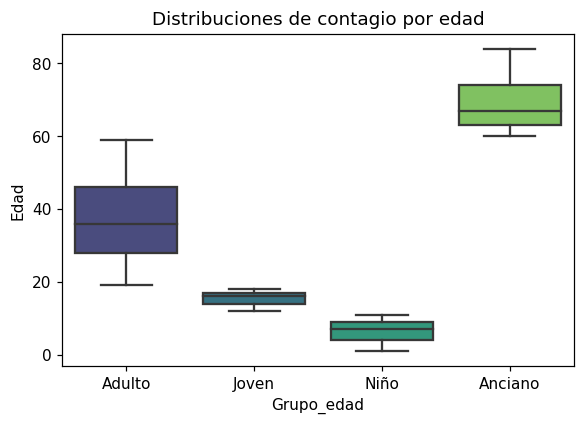

In [84]:
distribu_sexo_edad=sns.boxplot(x='Grupo_edad', y='Edad', data=df_final, palette='viridis')
plt.title('Distribuciones de contagio por edad')


Text(0.5, 1.0, 'Distribuciones de hombres y mujeres contagiados por covid')

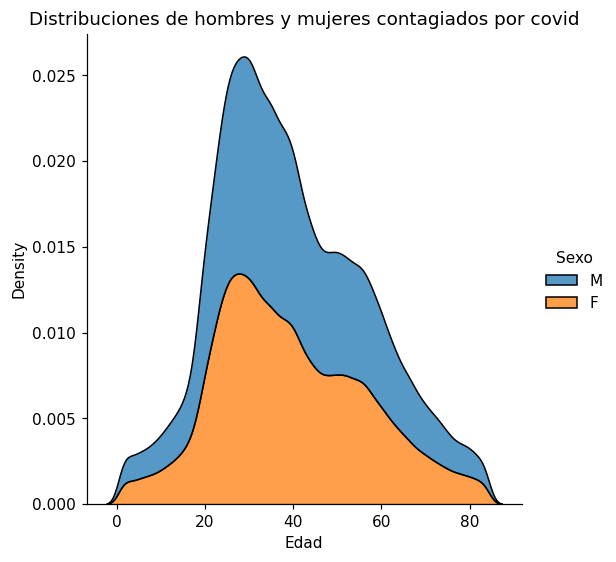

In [85]:
dsitri_sexo=sns.displot(df_final, x='Edad', hue='Sexo', kind='kde', multiple='stack')
plt.title('Distribuciones de hombres y mujeres contagiados por covid')

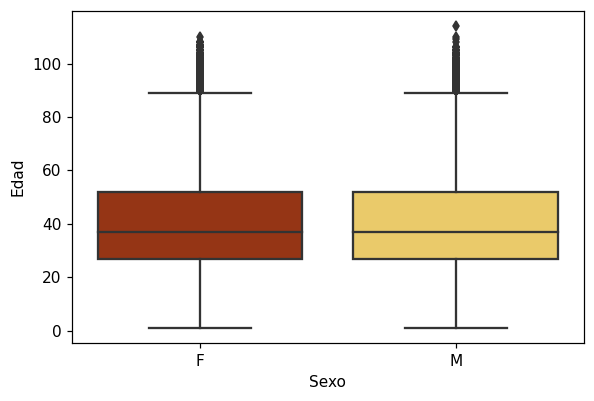

In [86]:
grupo=sns.boxplot(x='Sexo', y='Edad', data=df, palette='afmhot')

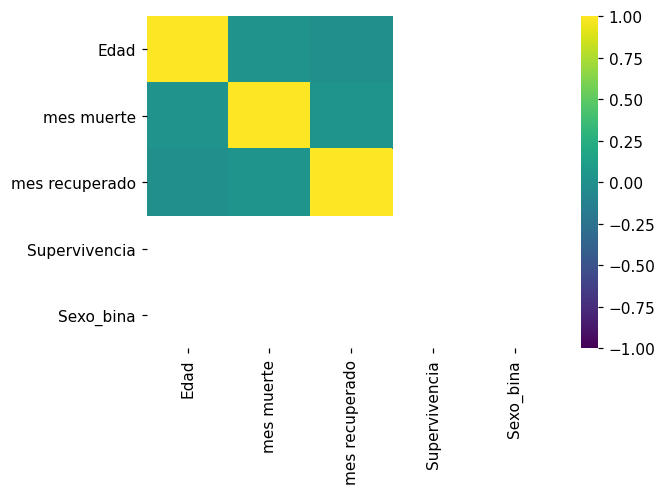

In [98]:
corr_covid=sns.heatmap(df.corr(), cmap='viridis', vmin=-1,vmax=1)

In [88]:
df.to_csv('covid_modi.csv')

Text(0.5, 1.0, 'Distribucion de edad')

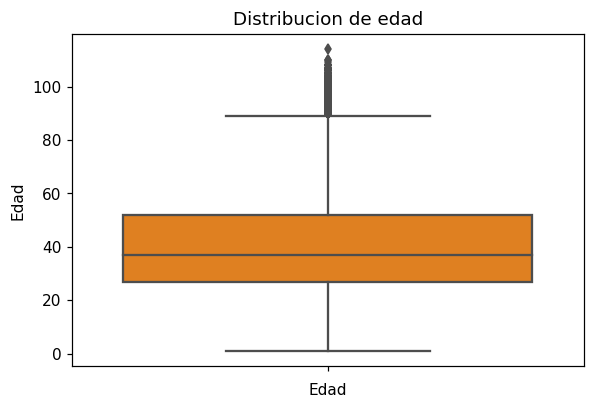

In [89]:
distrib_edad=sns.boxplot( data=df, y='Edad',palette='afmhot')
plt.xlabel('Edad')
plt.title('Distribucion de edad')

In [90]:
edad_max=df[df['Edad']<85]

Text(0.5, 1.0, 'Distribucion de edad')

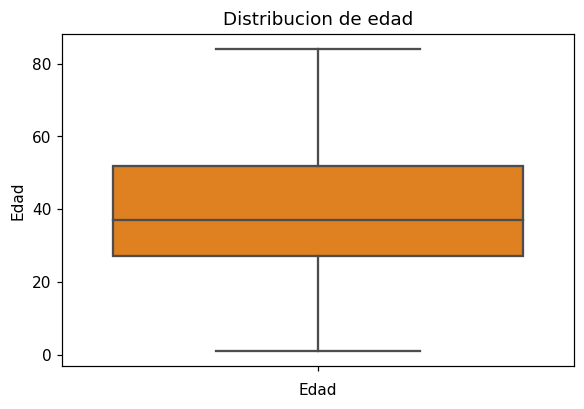

In [91]:
distrib_edad=sns.boxplot( data=edad_max, y='Edad',palette='afmhot')
plt.xlabel('Edad')
plt.title('Distribucion de edad')

Text(0.5, 1.0, ' Contagios por departamento y sexo')

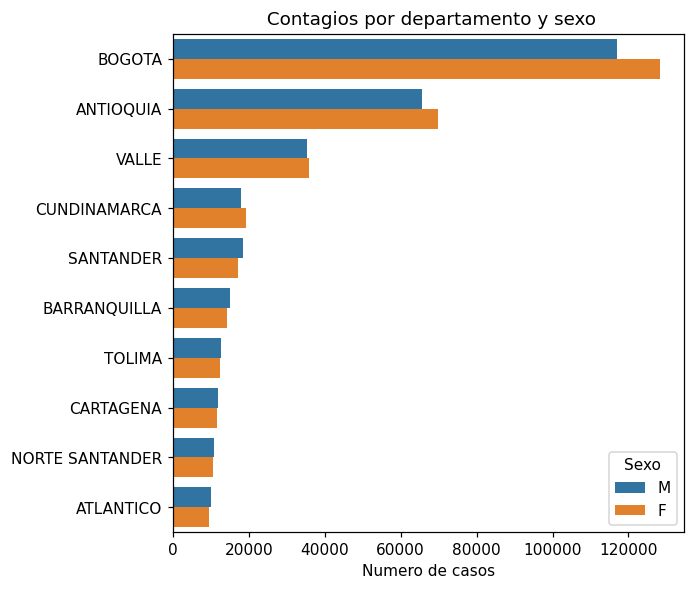

In [92]:
plt.figure(figsize=(6,6))

ax = sns.countplot(y="Nombre departamento", hue="Sexo", data=df_final, order=pd.value_counts(df_final['Nombre departamento']).iloc[:10].index)
plt.xlabel('Numero de casos')
plt.ylabel('')
plt.title(' Contagios por departamento y sexo')


Text(0.5, 1.0, 'Recuperados por mes-2020')

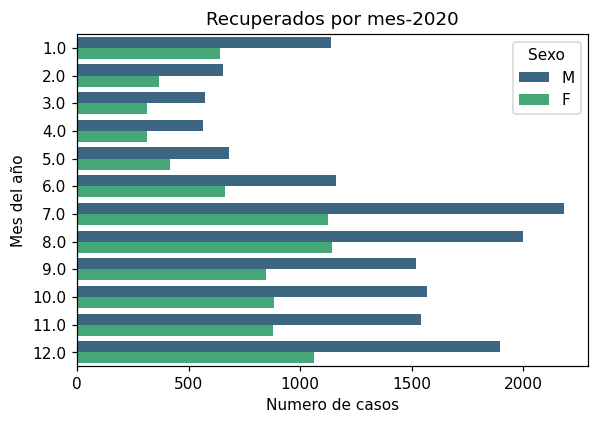

In [93]:
ax = sns.countplot(y="mes muerte", hue="Sexo", data=df_final, palette='viridis')
plt.xlabel('Numero de casos')
plt.ylabel('Mes del año')
plt.title('Recuperados por mes-2020')

Text(0.5, 1.0, 'Recuperados por mes-2020')

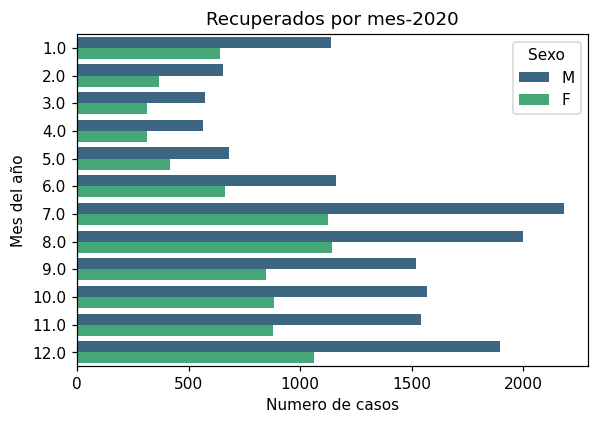

In [94]:
ax = sns.countplot(y="mes muerte", hue="Sexo", data=df_final, palette='viridis')
plt.xlabel('Numero de casos')
plt.ylabel('Mes del año')
plt.title('Recuperados por mes-2020')

<AxesSubplot:xlabel='Proportion', ylabel='mes muerte'>

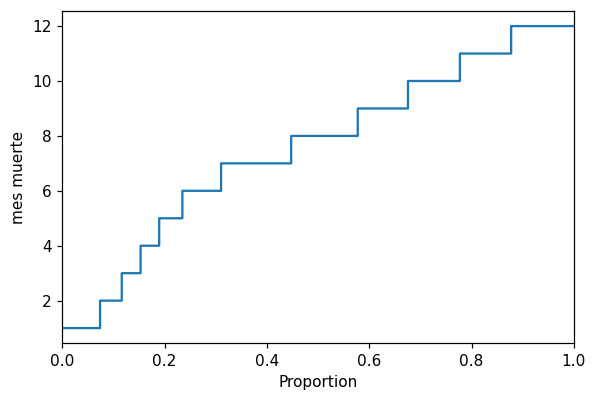

In [95]:
sns.ecdfplot(data=df_final, y="mes muerte")